1. step_1_lesson_7.csv (https://drive.google.com/file/d/1lAeyJjdw5NTGNkGLL438FpX63uDPdtYL/view?usp=sharing)
Для початку, давайте подивимося на розподіл відвідувань сайту щодня. Побудуйте графік із розподілом кількості відвідувань від ботів та звичайних користувачів.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from io import BytesIO
import requests
import gspread
from df2gspread import df2gspread as d2g
from oauth2client.service_account import ServiceAccountCredentials

In [2]:
step_1_lesson_7_url='https://drive.google.com/file/d/1lAeyJjdw5NTGNkGLL438FpX63uDPdtYL/view?usp=sharing'
step_1_lesson_7_path='https://drive.google.com/uc?id=' + step_1_lesson_7_url.split('/')[-2]
step_1_lesson_7 = pd.read_csv(step_1_lesson_7_path)

In [3]:
step_1_lesson_7.head()

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0


<AxesSubplot: xlabel='date', ylabel='visits'>

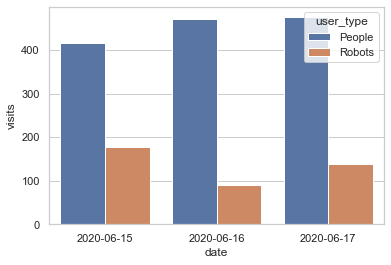

In [4]:
sns.set(style='whitegrid'
       ,rc={'figure.figsize': (17, 7)})

sns.barplot(x='date'
            ,y='visits'
            ,hue='user_type'
            ,data=step_1_lesson_7)

2. step_2_lesson_7.csv (https://drive.google.com/file/d/1GJ3sDMJPEryow9ufG-QGwxFmygr1Wyvd/view?usp=sharing)
Визначте відсоток відвідувань сайту із бразузера Google Chrome. Дані лежать тут.
Відповідь округліть до цілого.

In [5]:
step_2_lesson_7_url='https://drive.google.com/file/d/1GJ3sDMJPEryow9ufG-QGwxFmygr1Wyvd/view?usp=sharing'
step_2_lesson_7_path='https://drive.google.com/uc?id=' + step_2_lesson_7_url.split('/')[-2]
step_2_lesson_7 = pd.read_csv(step_2_lesson_7_path)

In [6]:
step_2_lesson_7.head()

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0


In [7]:
step_2_lesson_7['percent'] = step_2_lesson_7.visits.div(step_2_lesson_7.visits.sum()).mul(100).round(0)

In [8]:
step_2_lesson_7.query('browser == "Google Chrome"')

,date,browser,visits,percent
0,2020-06-15,Google Chrome,354.0,60.0


3. step_3_lesson_7.csv (https://drive.google.com/file/d/1YniSPBGWuQ5kbAnsUfae9DBLKGjHY2lF/view?usp=sharing)
Давайте з'ясуємо, з якого браузера приходить найбільше роботів. Подивіться на дані та визначте, у якого браузера найбільша частка відвідувань сайту ботами від загальної кількості відвідувань?
Як відповідь вкажіть назву браузера.

In [9]:
step_3_lesson_7_url='https://drive.google.com/file/d/1YniSPBGWuQ5kbAnsUfae9DBLKGjHY2lF/view?usp=sharing'
step_3_lesson_7_path='https://drive.google.com/uc?id=' + step_3_lesson_7_url.split('/')[-2]
step_3_lesson_7 = pd.read_csv(step_3_lesson_7_path)

In [10]:
step_3_lesson_7.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [11]:
visits_vs_browser = step_3_lesson_7.groupby('browser', as_index=False) \
                                    .agg({'visits': 'sum'})

In [12]:
full_step_3_lesson_7 = step_3_lesson_7.merge(visits_vs_browser
                                      ,on='browser'
                                      ,suffixes=('_type', '_all'))

In [13]:
full_step_3_lesson_7['share_visits'] = full_step_3_lesson_7.visits_type.div(full_step_3_lesson_7.visits_all) \
                                                            .mul(100) \
                                                            .round(2)

In [14]:
full_step_3_lesson_7.query('user_type == "Robots"') \
                    .sort_values('share_visits', ascending=False)

,date,browser,user_type,visits_type,visits_all,share_visits
15,2020-06-15,UCWEB,Robots,4.0,4.0,100.00
7,2020-06-15,Safari,Robots,22.0,41.0,53.66
4,2020-06-15,Firefox,Robots,31.0,58.0,53.45
20,2020-06-15,Chromium,Robots,1.0,2.0,50.00
12,2020-06-15,Opera,Robots,5.0,16.0,31.25
1,2020-06-15,Google Chrome,Robots,104.0,354.0,29.38
17,2020-06-15,Edge,Robots,1.0,5.0,20.00
3,2020-06-15,Yandex Browser,Robots,7.0,54.0,12.96
14,2020-06-15,Samsung Internet,Robots,1.0,9.0,11.11
10,2020-06-15,Mobile Safari,Robots,1.0,16.0,6.25


4. step_4_lesson_7.csv (https://drive.google.com/file/d/1ky194d65mODN0u_sTzYPU-i2pyyJrLA9/view?usp=sharing)
Загрегуйте дані за днем, типом користувача, браузером, створіть колонку з метрикою частки заходів на сайт для кожного з цих розрізів.
У відповіді вкажіть відсоток відкриттів сайту користувачами Safari (не ботами) з точністю до 1 знака після точки.
Hint: зверніть увагу, тут вам потрібно знайти частку заходів конкретних типів користувачів з конкретного браузера від взагалі всіх заходів на сайт за цей день.

In [15]:
step_4_lesson_7_url='https://drive.google.com/file/d/1ky194d65mODN0u_sTzYPU-i2pyyJrLA9/view?usp=sharing'
step_4_lesson_7_path='https://drive.google.com/uc?id=' + step_4_lesson_7_url.split('/')[-2]
step_4_lesson_7 = pd.read_csv(step_4_lesson_7_path)

In [16]:
step_4_lesson_7.head()

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [17]:
step_4_lesson_7.duplicated(['date','browser', 'user_type']).any()

False

In [18]:
step_4_lesson_7['percent'] = step_4_lesson_7.visits.div(step_4_lesson_7.visits.sum()).mul(100).round(1)

In [19]:
step_4_lesson_7.query('browser == "Safari" and user_type == "People"')

,date,browser,user_type,visits,percent
7,2020-06-15,Safari,People,19.0,3.2
